In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [3]:
df.shape

(159, 7)

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
# Species is a categorical feature
# Weight,Length1,Length2,Length3,Height,Width are continous numerical

In [14]:
#1b Five Point Summary for numerical variables

num=['Weight','Length1','Length2','Length3','Height','Width']

for i in num:
    print('Minimum value in',i,'feature is:',min(df[i]))
    
    print('25 Quantile is in',i,'is:',df[i].quantile(0.25))
    
    print('50 Quantile is in',i,'is:',df[i].quantile(0.50))
    
    print('75 Quantile is in',i,'is:',df[i].quantile(0.75))
    
    print('Maximum value in',i,'feature is:',max(df[i]))


Minimum value in Weight feature is: 0.0
25 Quantile is in Weight is: 120.0
50 Quantile is in Weight is: 273.0
75 Quantile is in Weight is: 650.0
Maximum value in Weight feature is: 1650.0
Minimum value in Length1 feature is: 7.5
25 Quantile is in Length1 is: 19.05
50 Quantile is in Length1 is: 25.2
75 Quantile is in Length1 is: 32.7
Maximum value in Length1 feature is: 59.0
Minimum value in Length2 feature is: 8.4
25 Quantile is in Length2 is: 21.0
50 Quantile is in Length2 is: 27.3
75 Quantile is in Length2 is: 35.5
Maximum value in Length2 feature is: 63.4
Minimum value in Length3 feature is: 8.8
25 Quantile is in Length3 is: 23.15
50 Quantile is in Length3 is: 29.4
75 Quantile is in Length3 is: 39.650000000000006
Maximum value in Length3 feature is: 68.0
Minimum value in Height feature is: 1.7284
25 Quantile is in Height is: 5.9448
50 Quantile is in Height is: 7.7860000000000005
75 Quantile is in Height is: 12.3659
Maximum value in Height feature is: 18.957
Minimum value in Width fe

In [15]:
# Summary for categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [20]:
a=df['Species'].value_counts()
cat = pd.DataFrame(a)
cat

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


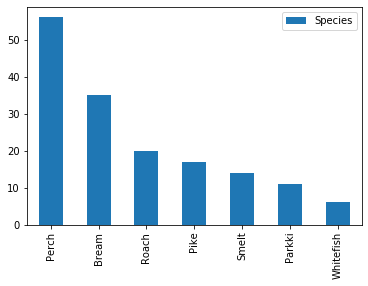

In [21]:
# Bar plot for the Species 
cat.plot(kind='bar')

([<matplotlib.patches.Wedge at 0x1c34749208>,
 [Text(0.4925997893879059, 0.9835372120540183, 'Perch'),
  Text(-1.0692251924802005, 0.25837470419078984, 'Bream'),
  Text(-0.7263011784050116, -0.8261274709434928, 'Roach'),
  Text(0.010866933463401687, -1.0999463213071363, 'Pike'),
  Text(0.6412773934759526, -0.8937355898791814, 'Smelt'),
  Text(0.9883556249116893, -0.4828593570652063, 'Parkki'),
  Text(1.092279199294596, -0.1301005410763399, 'Whitefish')],
 [Text(0.268690794211585, 0.5364748429385554, '35.220125'),
  Text(-0.5832137413528367, 0.1409316568313399, '22.012578'),
  Text(-0.39616427913000635, -0.45061498415099605, '12.578617'),
  Text(0.005927418252764556, -0.5999707207129834, '10.691824'),
  Text(0.3497876691687014, -0.4874921399340989, '8.805031'),
  Text(0.5391030681336486, -0.2633778311264761, '6.918239'),
  Text(0.5957886541606886, -0.07096393149618539, '3.773585')])

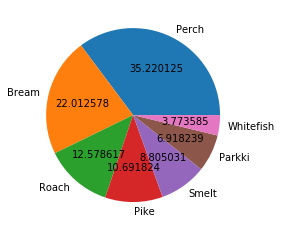

In [25]:
# Pie chart to shw percaentage of species
plt.pie(a,autopct='%1f',labels=cat.index.values)

In [27]:
# Percent of categorical features
(cat['Species']/cat['Species'].sum()) * 100

    

Perch        35.220126
Bream        22.012579
Roach        12.578616
Pike         10.691824
Smelt         8.805031
Parkki        6.918239
Whitefish     3.773585
Name: Species, dtype: float64

In [29]:
# Checking missing values
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
# There are no missing values

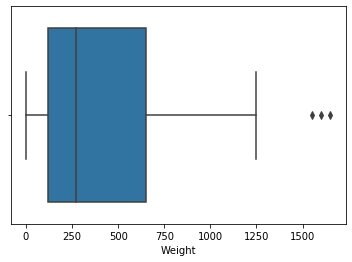

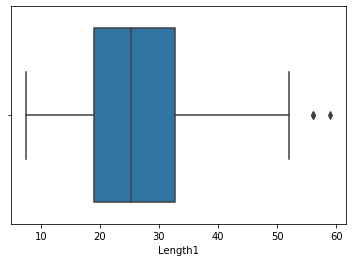

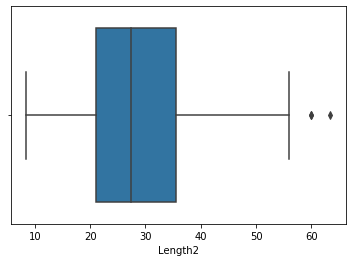

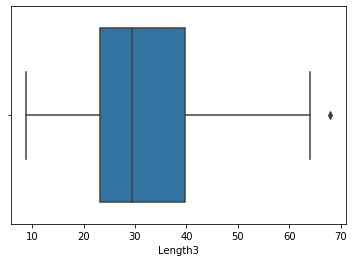

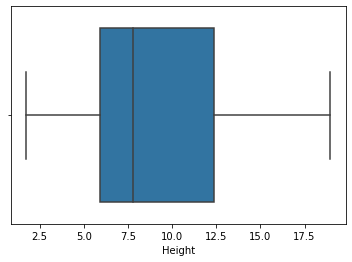

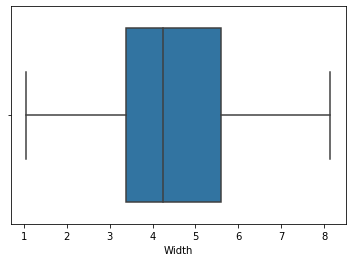

In [40]:
# To check for outliers
num
for i in num:
    sns.boxplot(df[i])
    plt.show()


    

In [ ]:
# Weight , Length1 , Length2 , Lenght3 have extreme right outliers

In [ ]:
# 2 . Data Preperation


In [ ]:
# a. Fix the defects found above and do appropriate treatment if any. (3 marks)
# We dont have any missing values . But we have outliers in Weight , Length1 , Length2 , Lenght3


In [42]:
# Outliers in weight
q1 = df['Weight'].quantile(0.25)
q3 = df['Weight'].quantile(0.75)
iqr = q3 - q1
LL = q1 - (1.5*iqr)
UL = q3 + (1.5*iqr)
df[df['Weight']>UL]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [43]:
df[df['Weight']<LL]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [ ]:
# THere are only 3 outliers in weight and hence we need not remove them as we may loss data

In [44]:
q1 = df['Length1'].quantile(0.25)
q3 = df['Length1'].quantile(0.75)
iqr = q3 - q1
LL = q1 - (1.5*iqr)
UL = q3 + (1.5*iqr)
df[df['Length1']>UL]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [47]:
df[df['Length1']<LL]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [45]:
q1 = df['Length2'].quantile(0.25)
q3 = df['Length2'].quantile(0.75)
iqr = q3 - q1
LL = q1 - (1.5*iqr)
UL = q3 + (1.5*iqr)
df[df['Length2']>UL]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [46]:
q1 = df['Length3'].quantile(0.25)
q3 = df['Length3'].quantile(0.75)
iqr = q3 - q1
LL = q1 - (1.5*iqr)
UL = q3 + (1.5*iqr)
df[df['Length3']>UL]

,Species,Weight,Length1,Length2,Length3,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.48


In [ ]:
# Hence we find 3 common outliers in all the Weights and Lenghts . Hence we drop these 3 columns

In [48]:
zam = df

In [49]:
df.drop(index=[142,143,144],inplace=True)

In [51]:
df.shape

(156, 7)

In [52]:
#Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (3 marks)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


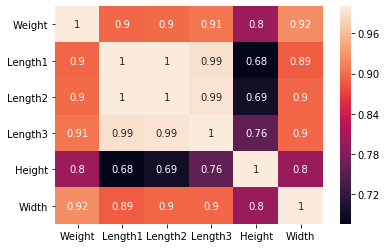

In [54]:
sns.heatmap(df.corr(),annot=True)

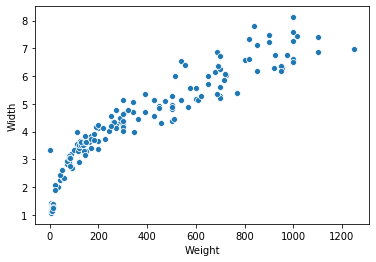

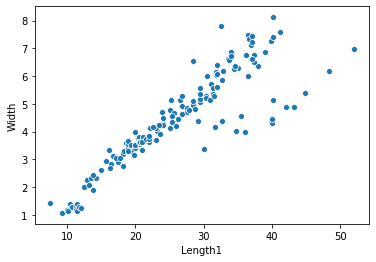

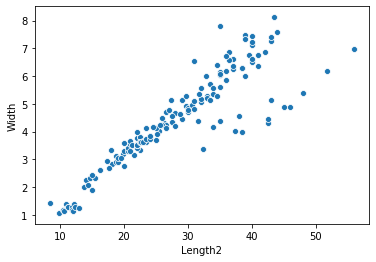

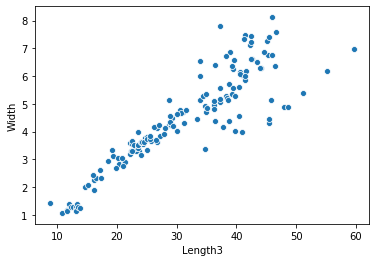

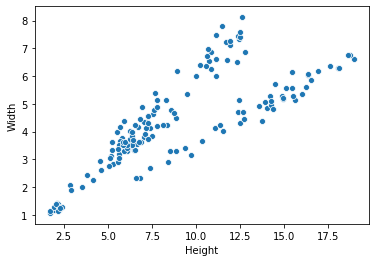

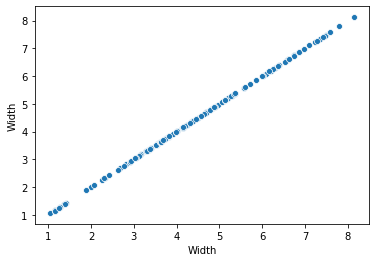

In [58]:
for i in num:
    sns.scatterplot(df[i],df['Width'])
    plt.show()

In [ ]:
# All the numerical fetures are having strong positive correlation with the target variable. hence we need not drop any feature

In [ ]:
# Also all the independent varibales are having corelation with width which we can infere from the scatter plot

In [ ]:
# As the Species name of the fish will not have any affect on width , hence we would drop the Species columns before building our model

In [55]:
df.drop(columns='Species',inplace=True)

In [56]:
df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


In [ ]:
#Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks)

# We are going to Drop only Species column
# All other features are having strong correlation with the width

In [59]:
# D . Splitting into Training and Tesitng data

X = df.drop(columns=['Width'])
y = df['Width']

In [61]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [62]:
x_train

,Weight,Length1,Length2,Length3,Height
63,90.0,16.3,17.7,19.8,7.4052
52,290.0,24.0,26.0,29.2,8.8768
134,456.0,40.0,42.5,45.5,7.2800
51,180.0,23.6,25.2,27.9,7.0866
79,80.0,17.2,19.0,20.2,5.6358
29,1000.0,33.5,37.0,42.6,18.9570
3,363.0,26.3,29.0,33.5,12.7300
39,120.0,18.6,20.0,22.2,6.2160
84,125.0,19.0,21.0,22.5,5.6925
13,340.0,29.5,32.0,37.3,13.9129


In [64]:
x_test

,Weight,Length1,Length2,Length3,Height
90,110.0,20.0,22.0,23.5,5.5225
76,70.0,15.7,17.4,18.5,4.5880
37,78.0,17.5,18.8,21.2,5.5756
11,500.0,28.7,31.0,36.2,14.3714
70,273.0,23.0,25.0,28.0,11.0880
150,8.7,10.8,11.3,12.6,1.9782
119,850.0,36.9,40.0,42.3,11.9286
60,1000.0,37.3,40.0,43.5,12.3540
46,140.0,21.0,22.5,25.0,6.5500
65,150.0,18.4,20.0,22.4,8.8928


In [65]:
y_train

63     2.6730
52     4.4968
134    4.3225
51     3.9060
79     3.0502
29     6.6030
3      4.4555
39     3.5742
84     3.6675
13     5.0728
104    4.3350
77     3.3216
107    4.6354
54     5.3550
78     3.1234
26     6.0900
8      4.8438
43     3.7544
115    6.3666
120    7.2250
124    7.2772
59     6.5736
15     5.5800
53     4.7736
20     5.5695
14     5.1708
80     3.0368
126    8.1420
12     4.3680
117    6.0030
        ...  
9      4.9594
149    1.2772
4      5.1340
38     3.1746
133    3.9770
34     6.3705
112    6.8640
56     4.2485
69     3.6636
44     3.5478
19     5.7276
6      5.2785
55     4.2476
75     2.6316
0      4.0200
135    4.4590
127    7.5958
68     3.1571
136    5.1296
42     3.2943
110    6.3875
89     3.5250
72     1.4080
23     6.1306
145    1.0476
92     3.6240
103    4.3350
154    1.3936
67     3.4104
25     6.0532
Name: Width, Length: 109, dtype: float64

In [66]:
y_test

90     3.9950
76     2.9415
37     2.9044
11     4.8146
70     4.1440
150    1.2852
119    7.1064
60     6.5250
46     3.3250
65     3.2928
130    4.3844
148    1.3800
155    1.2690
114    6.2646
24     5.5890
82     3.5550
86     3.4075
74     2.4320
102    5.1373
88     3.5250
49     3.6312
40     3.3516
158    1.8792
28     6.1984
32     6.7497
41     3.3957
132    4.5765
122    6.6300
153    1.1484
146    1.1600
85     3.5340
106    4.2042
45     3.8203
138    4.8700
131    4.0198
22     5.2801
140    6.1712
62     2.3142
66     3.2944
36     2.8217
5      4.9274
17     5.1975
109    6.0180
94     3.6260
125    7.4165
137    4.8960
129    4.1580
Name: Width, dtype: float64

In [67]:
y_train.mean()

4.4958211009174285

In [68]:
y_test.mean()

4.0971851063829785

In [ ]:
# Means of both Y_train and y_test are almost . Thus both the train and test data reperesnets the data

In [ ]:
# 3 . Model Building for training data

In [79]:
# Raw OLS for training datasset
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(x_train)  # To learn b0 . linear regressin model will learn bo by defalut but we have to pass as parameter in ols
modeltr = sm.OLS(y_train,X_constant).fit()
modeltr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Width   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           1.66e-53
Time:                        15:01:24   Log-Likelihood:                -75.779
No. Observations:                 109   AIC:                             163.6
Df Residuals:                     103   BIC:                             179.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7186      0.260      2.762      0.007       0.203       1.235
Weight         0.0012      0.000      2.533      0.013       0.000       0.002
Length1        0.0055      0.195      0.028      0.977      -0.381       0.392
Length2        0.5482      0.190      2.888      0.005       0.172       0.925
Length3       -0.4729      0.076     -6.201      0.000      -0.624      -0.322
Height         0.2584      0.041      6.366      0.000       0.178       0.339
==============================================================================
Omnibus:                        2.422   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.420
Skew:                           0.349   Prob(JB):                        0.298
Kurtosis:                       2.787   Cond. No.                     2.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
# Mean Squared Error:
sse = sum((modeltr.resid)**2)
#mse = sse/(no of observations)
mse = sse/109
mse

0.23517307933870016

In [80]:
# Raw OLS for testing datasset
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(x_test)  # To learn b0 . linear regressin model will learn bo by defalut but we have to pass as parameter in ols
modelte = sm.OLS(y_test,X_constant).fit()
modelte.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Width   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           4.76e-26
Time:                        15:01:35   Log-Likelihood:                -18.126
No. Observations:                  47   AIC:                             48.25
Df Residuals:                      41   BIC:                             59.35
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6542      0.265      2.471      0.018       0.119       1.189
Weight         0.0011      0.001      1.998      0.052   -1.22e-05       0.002
Length1       -0.5773      0.264     -2.184      0.035      -1.111      -0.044
Length2        1.0319      0.242      4.258      0.000       0.543       1.521
Length3       -0.4060      0.078     -5.183      0.000      -0.564      -0.248
Height         0.1997      0.044      4.494      0.000       0.110       0.289
==============================================================================
Omnibus:                        2.396   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.947
Skew:                           0.356   Prob(JB):                        0.378
Kurtosis:                       2.301   Cond. No.                     3.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Adj R-squared value of training data is less and close to Adj R-squared value of testing data . Hence the model is good. But still we need to check for the assumptions

In [71]:
# Model using linear regression for training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')

Coefficients: [ 0.00120115  0.00554398  0.54816623 -0.47293226  0.25838889]
Intercept: 0.7186480824000809
R^2 score: 0.9151858136297862


In [72]:
# Model using linear regression for testing data
lin_reg = LinearRegression()
lin_reg.fit(x_test, y_test)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_test, y_test)}')

Coefficients: [ 0.00111196 -0.57730087  1.03189177 -0.40596727  0.19972097]
Intercept: 0.6542043101741495
R^2 score: 0.9527520937559139


In [ ]:
# # Adj R-squared value of training data is less and close to Adj R-squared value of testing data . Hence the model is good. But still we need to check for the assumptions

In [ ]:
# Checking the assumptions of the model

In [ ]:
# Check for multi-collinearity using vif test

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Weight,Length1,Length2,Length3,Height
vif,10.194209,2177.570827,2105.392937,257.333709,11.169964


In [ ]:
# We have very large vif values for Length1,Lenght2,length3 (>20) . THus these 3 columns have multi collinearity . we need to identify the significant features from these

In [ ]:
# From model summary , DB-value for training data is 1.950 which is close to 2 . Hence no autocorrelation occurs

In [81]:
# Test for normality of residuals
from scipy import stats
print(stats.jarque_bera(modeltr.resid))

(2.4204563138534, 0.29812925141588886)


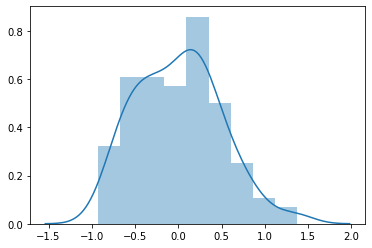

In [82]:
sns.distplot(modeltr.resid)

In [ ]:
# My p_value in JB test is > 0.05 . We fail to reject H0 which is residuals are normal. 
# Thus my residuals are normal . Same can be inferred form the graph.

In [83]:
# Test for linearity of residuals
# Rainbow test
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=modeltr, frac=0.5)

(0.6660428629342824, 0.9272844634429196)

In [ ]:
## My p_value in rainbow test is > 0.05 . We fail to reject H0 which is residuals are linear. 
# THus my residuals are linear with predicted values. Same can be inferred with the graph below

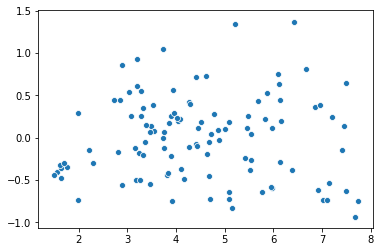

In [84]:
sns.scatterplot(modeltr.predict(),modeltr.resid)

In [85]:
modeltr.resid.mean()

1.817098968744293e-15

In [ ]:
# Also the mean of residuals is close to zero . Hence residuals are disturbuted equally over the mean

In [ ]:
#From the scatter plot , we can predict that Heteroscadisticty occurs.

#THus from the Assumptions, we conclude that the multicolinearity exists in the features

In [100]:
modelrfe = LinearRegression()
rfe = RFE(modelrfe, 4)
X_rfe = rfe.fit_transform(x_train,y_train)  
#Fitting the data to model
modelrfe.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True]
[2 1 1 1 1]


In [97]:
df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


In [ ]:
# Here weight is given as rank 2 . However as Length1,Lenght2,Length3 are having higher vif values, we will drop Lenght3 with greates vif value to eliminate multi collinearit

In [102]:
# TO Drop Lenght3
df.drop(columns='Length3',inplace=True)

In [103]:
df

,Weight,Length1,Length2,Height,Width
0,242.0,23.2,25.4,11.5200,4.0200
1,290.0,24.0,26.3,12.4800,4.3056
2,340.0,23.9,26.5,12.3778,4.6961
3,363.0,26.3,29.0,12.7300,4.4555
4,430.0,26.5,29.0,12.4440,5.1340
5,450.0,26.8,29.7,13.6024,4.9274
6,500.0,26.8,29.7,14.1795,5.2785
7,390.0,27.6,30.0,12.6700,4.6900
8,450.0,27.6,30.0,14.0049,4.8438
9,500.0,28.5,30.7,14.2266,4.9594


In [104]:
# we shall now run the model with latest features
x_train.drop(columns='Length3',inplace=True)


In [105]:
x_test.drop(columns='Length3',inplace=True)

In [106]:
x_train

,Weight,Length1,Length2,Height
60,1000.0,37.3,40.0,12.3540
2,340.0,23.9,26.5,12.3778
145,6.7,9.3,9.8,1.7388
43,150.0,20.4,22.0,5.8045
66,140.0,19.0,20.7,8.5376
10,475.0,28.4,31.0,14.2628
156,12.2,12.1,13.0,2.2770
129,300.0,31.7,34.0,5.7078
153,9.8,11.4,12.0,2.2044
146,7.5,10.0,10.5,1.9720


In [107]:
# Model using linear regression for training data with significant features
lin_reg1 = LinearRegression()
lin_reg1.fit(x_train, y_train)

print(f'Coefficients: {lin_reg1.coef_}')
print(f'Intercept: {lin_reg1.intercept_}')
print(f'R^2 score: {lin_reg1.score(x_train, y_train)}')

Coefficients: [ 0.00213736 -0.51201206  0.5531619   0.05118878]
Intercept: 0.8643579187799171
R^2 score: 0.910934848943919


In [110]:
# Model Reguralization using Ridge
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
# alpha = 0.01
rr = Ridge(alpha=0.01) 
rr.fit(x_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [112]:
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)

In [113]:
print(Ridge_train_score)
print(Ridge_test_score)

0.9109347968352068
0.8287660983069504


In [115]:
# alpha = 50
rr50 = Ridge(alpha=50) 
rr50.fit(x_train, y_train)
Ridge_train_score = rr50.score(x_train,y_train)
Ridge_test_score = rr50.score(x_test, y_test)
print(Ridge_train_score)
print(Ridge_test_score)

0.9057095530105919
0.8368581875315997


In [117]:
# alpha = 100
rr100 = Ridge(alpha=100) 
rr100.fit(x_train, y_train)
Ridge_train_score = rr100.score(x_train,y_train)
Ridge_test_score = rr100.score(x_test, y_test)
print(Ridge_train_score)
print(Ridge_test_score)

0.905168176119173
0.8378428949382608


In [119]:
# alpha = 1000
rr1000 = Ridge(alpha=1000) 
rr1000.fit(x_train, y_train)
Ridge_train_score = rr1000.score(x_train,y_train)
Ridge_test_score = rr1000.score(x_test, y_test)
print(Ridge_train_score)
print(Ridge_test_score)

0.8975275886204546
0.8430648529927223


In [121]:
# alpha = 5000
rr500 = Ridge(alpha=5000) 
rr500.fit(x_train, y_train)
Ridge_train_score = rr500.score(x_train,y_train)
Ridge_test_score = rr500.score(x_test, y_test)
print(Ridge_train_score)
print(Ridge_test_score)

0.8813427455854339
0.8414790851425799


In [ ]:
# Now the model is regularized by giving penalty to the fetures

In [ ]:
# Thus weight, Height and Length1,lenght2 are the significant features

,Weight,Length1,Length2,Height,Width
0,242.0,23.2,25.4,11.5200,4.0200
1,290.0,24.0,26.3,12.4800,4.3056
2,340.0,23.9,26.5,12.3778,4.6961
3,363.0,26.3,29.0,12.7300,4.4555
4,430.0,26.5,29.0,12.4440,5.1340
5,450.0,26.8,29.7,13.6024,4.9274
6,500.0,26.8,29.7,14.1795,5.2785
7,390.0,27.6,30.0,12.6700,4.6900
8,450.0,27.6,30.0,14.0049,4.8438
9,500.0,28.5,30.7,14.2266,4.9594


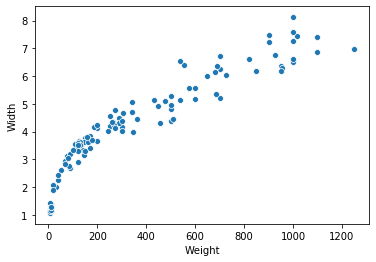

In [128]:
# we can check the scatter plot of these features with target
sns.scatterplot(x_train['Weight'],y_train)

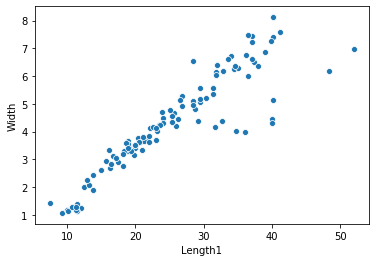

In [131]:

sns.scatterplot(x_train['Length1'],y_train)

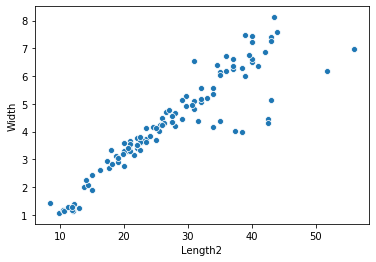

In [132]:
sns.scatterplot(x_train['Length2'],y_train)

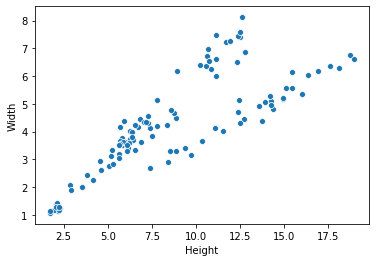

In [133]:
sns.scatterplot(x_train['Height'],y_train)

In [ ]:
# Lenght1, Weight1 and Height are the most significant feature

In [ ]:
# All these three are having postive slopes(Target feature will increase if either of these feature increases or vice-versa)

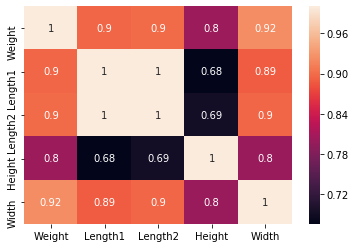

In [139]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# length1 and Weight are affecting the Target variable the most

[6.66252919 4.64636655 1.62695974 3.20660281 3.32283968 5.21657513
 2.00274932 4.37446321 1.7991499  1.66941173 2.88095243 7.11023044
 3.38295606 8.43551451 3.53996389 4.6423803  2.2915147  2.20517499
 6.57045512 3.35430099 3.4371375  3.10029252 3.64716611 3.74992844
 3.68948661 3.24218161 3.6228686  4.90006936 7.13500882 5.27744683
 5.64927588 5.58505189 3.03953754 4.03250453 2.83525488 4.8676303
 2.28864917 3.36292504 5.36585391 3.42781146 6.84956505 3.31109067
 4.02643523 5.16240294 5.40899441 5.560297   5.33267274 3.39187159
 4.79344917 3.19276417 5.12196459 6.31780787 4.34874932 3.14152161
 3.28238943 4.38289651 7.12655806 1.65998845 3.11720584 3.97834122
 4.89379094 5.24054626 5.81434323 3.99856676 2.97180117 5.22944492
 4.01937481 1.74041875 7.02042403 4.14292599 7.02015398 6.66550385
 4.16915206 5.71771382 2.49055314 2.3567696  6.18826374 6.24292383
 2.37726024 7.20754464 4.42731481 6.93643121 5.67136567 7.11647801
 7.28668883 3.63148279 3.27903029 3.02730503 5.63166102 1.85787

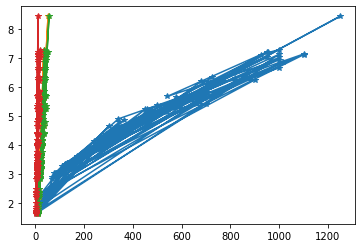

In [150]:
# To plot all the features of training data with the predicted values
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


# Predicted values for testing data
Y_predicted=lin_reg.predict(x_train)
plt.plot(x_train,Y_predicted,marker='*')
print(Y_predicted)

In [ ]:
# Thus all the features are increasing with target

# Most significant features to predict the target(width) in order of rank

rank 1 : Lenght1/Lenght2
rank 2 : Weight
rank 3 : Height
Lenght 3 is eliminated due to high multi collinearity
The model after regulization with high aplha value(5000) using ridge is fine
